<a href="https://colab.research.google.com/github/JamesMcGuigan/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1.0 -q

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
import tensorflow.keras.utils as ku 
import tensorflow as tf
import numpy as np 
import math

In [0]:
tokenizer = Tokenizer()
!wget -c --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [0]:
label.shape

In [0]:
total_words

In [0]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words, 256))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01), 
    # optimizer=tf.keras.optimizers.Adadelta(1), 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)
print(model.summary())

In [0]:
history = model.fit(predictors, label, epochs=100, verbose=1)

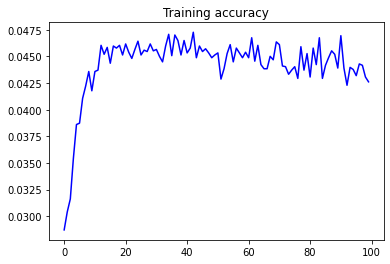

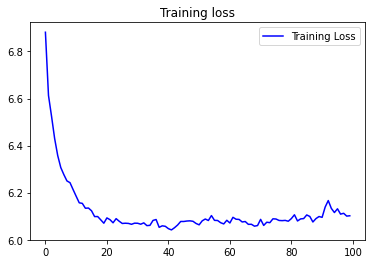

In [93]:
import matplotlib.pyplot as plt
acc  = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [94]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted  = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of the world of
